In [1]:
import pandas as pd
pd.__version__


'2.2.2'

In [3]:
import os
os.listdir()


['.ipynb_checkpoints', '01_eda.ipynb', 'archive (1)', 'archive (1).zip']

In [5]:
os.listdir("archive (1)")


['store.csv', 'test.csv', 'train.csv']

In [7]:
train_path = "archive (1)/train.csv"
train = pd.read_csv(train_path)
train.head()


C:\Users\yosep\AppData\Local\Temp\ipykernel_15860\169150279.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
train.shape


(1017209, 9)

In [11]:
train.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [13]:
train.isna().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
train["Date"] = pd.to_datetime(train["Date"])
train["Date"].dtype


dtype('<M8[ns]')

In [17]:
train["Date"].min(), train["Date"].max()


(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [19]:
train["Store"].nunique(), train["Store"].unique()[:10]


(1115, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))

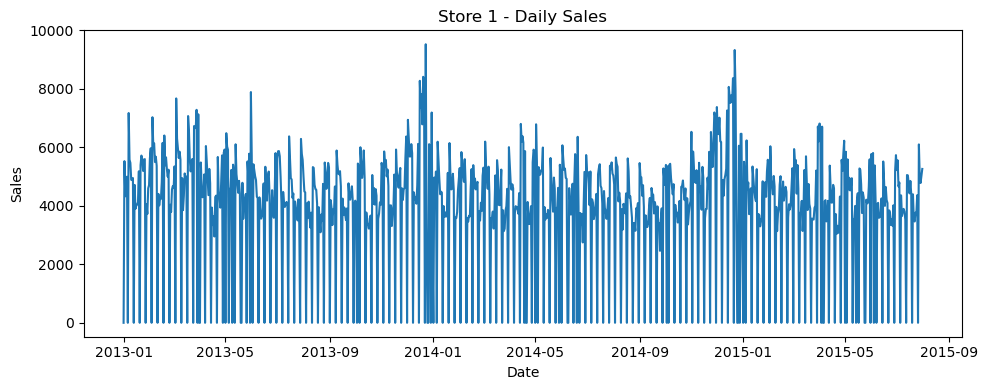

In [21]:
import matplotlib.pyplot as plt

store_1 = train[train["Store"] == 1].sort_values("Date")

plt.figure(figsize=(10, 4))
plt.plot(store_1["Date"], store_1["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Store 1 - Daily Sales")
plt.tight_layout()


In [23]:
train["Sales"].describe()


count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [25]:
train_clean = train[(train["Open"] == 1) & (train["Sales"] > 0)].copy()
train_clean.shape


(844338, 9)

In [27]:
store_path = "archive (1)/store.csv"
store = pd.read_csv(store_path)
store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
full = train_clean.merge(store, on="Store", how="left")
full.shape


(844338, 18)

In [31]:
full.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [33]:
full["Year"] = full["Date"].dt.year
full["Month"] = full["Date"].dt.month

full[["Date", "Year", "Month"]].head()


,Date,Year,Month
0,2015-07-31,2015,7
1,2015-07-31,2015,7
2,2015-07-31,2015,7
3,2015-07-31,2015,7
4,2015-07-31,2015,7


In [35]:
full = full.sort_values(["Store", "Date"]).reset_index(drop=True)
full[["Store", "Date", "Sales"]].head()


,Store,Date,Sales
0,1,2013-01-02,5530
1,1,2013-01-03,4327
2,1,2013-01-04,4486
3,1,2013-01-05,4997
4,1,2013-01-07,7176


In [37]:
full["Sales_lag_7"] = full.groupby("Store")["Sales"].shift(7)
full[["Store", "Date", "Sales", "Sales_lag_7"]].head(10)


,Store,Date,Sales,Sales_lag_7
0,1,2013-01-02,5530,NaN
1,1,2013-01-03,4327,NaN
2,1,2013-01-04,4486,NaN
3,1,2013-01-05,4997,NaN
4,1,2013-01-07,7176,NaN
5,1,2013-01-08,5580,NaN
6,1,2013-01-09,5471,NaN
7,1,2013-01-10,4892,5530.0
8,1,2013-01-11,4881,4327.0
9,1,2013-01-12,4952,4486.0


In [39]:
full_model = full.dropna(subset=["Sales_lag_7"]).copy()
full_model.shape


(836533, 21)

In [45]:

split_date = pd.to_datetime("2015-04-01")

train_data = full_model[full_model["Date"] < split_date].copy()
test_data  = full_model[full_model["Date"] >= split_date].copy()

train_data["Date"].min(), train_data["Date"].max(), test_data["Date"].min(), test_data["Date"].max()


(Timestamp('2013-01-08 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-07-31 00:00:00'))

In [47]:
# features (inputs) I will use for the first simple model
feature_cols = ["Store", "DayOfWeek", "Promo", "Year", "Month", "Sales_lag_7"]

X_train = train_data[feature_cols]
y_train = train_data["Sales"]

X_test  = test_data[feature_cols]
y_test  = test_data["Sales"]

X_train.shape, X_test.shape


((725112, 6), (111421, 6))

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# predictions on the test set
y_pred_test = rf.predict(X_test)

# RMSE
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# MAPE (in %)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100

rmse_test, mape_test


C:\Users\yosep\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(1703.4227911619287, 18.322808668124626)

In [53]:
print(f"Test RMSE: {rmse_test:,.2f}")
print(f"Test MAPE: {mape_test:.2f}%")


Test RMSE: 1,703.42
Test MAPE: 18.32%


In [55]:
# baseline: predict today's sales = sales from 7 days ago
baseline_pred = X_test["Sales_lag_7"].values

baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)
baseline_mape = mean_absolute_percentage_error(y_test, baseline_pred) * 100

print(f"Baseline RMSE: {baseline_rmse:,.2f}")
print(f"Baseline MAPE: {baseline_mape:.2f}%")
print("-----")
print(f"RandomForest RMSE: {rmse_test:,.2f}")
print(f"RandomForest MAPE: {mape_test:.2f}%")


Baseline RMSE: 3,053.46
Baseline MAPE: 36.26%
-----
RandomForest RMSE: 1,703.42
RandomForest MAPE: 18.32%


C:\Users\yosep\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
improvement_mape = baseline_mape - mape_test
improvement_percent = improvement_mape / baseline_mape * 100

print(f"MAPE improvement: {improvement_mape:.2f} percentage points")
print(f"Relative improvement over baseline: {improvement_percent:.2f}%")


MAPE improvement: 17.93 percentage points
Relative improvement over baseline: 49.46%


In [59]:
metrics = pd.DataFrame({
    "model": ["Baseline (lag-7)", "RandomForest"],
    "rmse":  [baseline_rmse, rmse_test],
    "mape":  [baseline_mape, mape_test]
})

metrics


,model,rmse,mape
0,Baseline (lag-7),3053.463306,36.256860
1,RandomForest,1703.422791,18.322809


In [61]:
metrics.to_csv("model_metrics.csv", index=False)


In [63]:
import numpy as np

importances = rf.feature_importances_
for name, val in zip(feature_cols, importances):
    print(f"{name:12s} : {val:.3f}")


Store        : 0.168
DayOfWeek    : 0.079
Promo        : 0.206
Year         : 0.017
Month        : 0.059
Sales_lag_7  : 0.472


In [65]:
importances_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

importances_df


,feature,importance
5,Sales_lag_7,0.471657
2,Promo,0.205588
0,Store,0.167598
1,DayOfWeek,0.079012
4,Month,0.059468
3,Year,0.016677


In [67]:
importances_df.to_csv("feature_importances.csv", index=False)


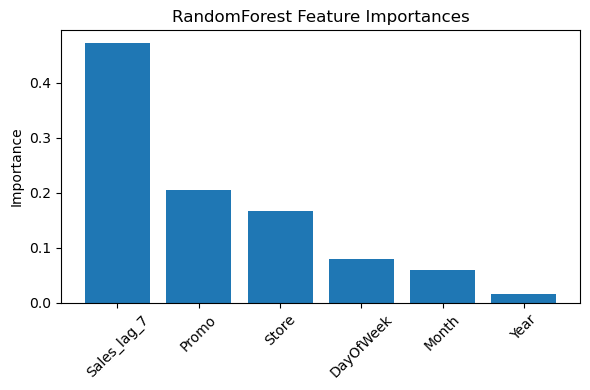

In [69]:
plt.figure(figsize=(6, 4))
plt.bar(importances_df["feature"], importances_df["importance"])
plt.ylabel("Importance")
plt.title("RandomForest Feature Importances")
plt.xticks(rotation=45)
plt.tight_layout()


In [71]:
test_results = test_data.copy()
test_results["PredictedSales"] = y_pred_test
test_results["Error"] = test_results["PredictedSales"] - test_results["Sales"]

test_results[["Store", "Date", "Sales", "PredictedSales", "Error"]].head()


,Store,Date,Sales,PredictedSales,Error
682,1,2015-04-01,6816,4989.56,-1826.44
683,1,2015-04-02,6574,5065.21,-1508.79
684,1,2015-04-04,6709,5377.67,-1331.33
685,1,2015-04-07,4163,4649.70,486.70
686,1,2015-04-08,4194,5188.45,994.45


In [73]:
test_results.to_csv("test_results_with_predictions.csv", index=False)


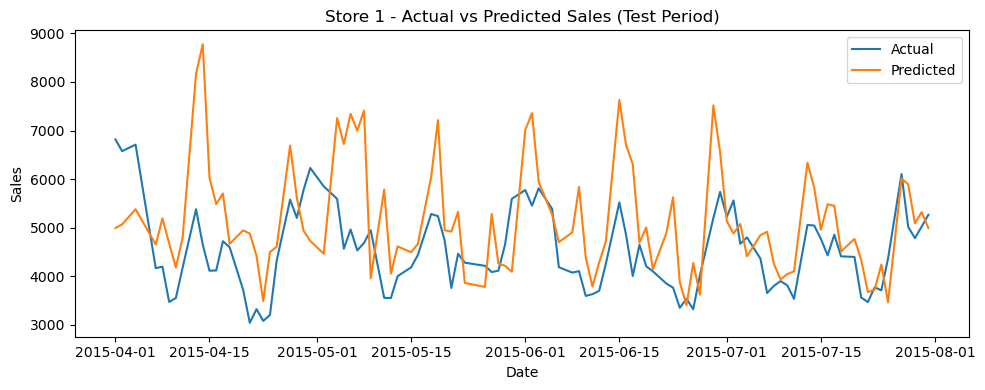

In [75]:
# choose one store from the test set
one_store_id = test_results["Store"].iloc[0]

store_test = test_results[test_results["Store"] == one_store_id].sort_values("Date")

plt.figure(figsize=(10, 4))
plt.plot(store_test["Date"], store_test["Sales"], label="Actual")
plt.plot(store_test["Date"], store_test["PredictedSales"], label="Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title(f"Store {one_store_id} - Actual vs Predicted Sales (Test Period)")
plt.legend()
plt.tight_layout()


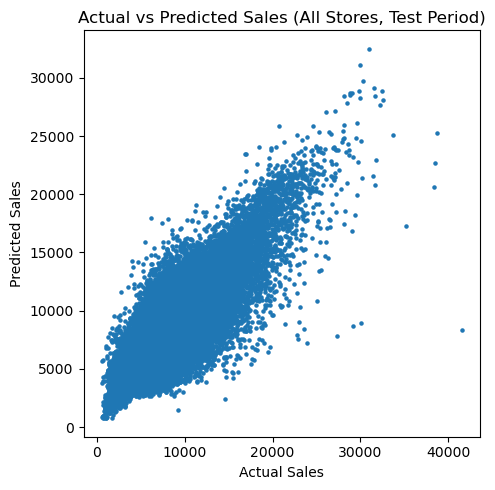

In [77]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_test, s=5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (All Stores, Test Period)")
plt.tight_layout()


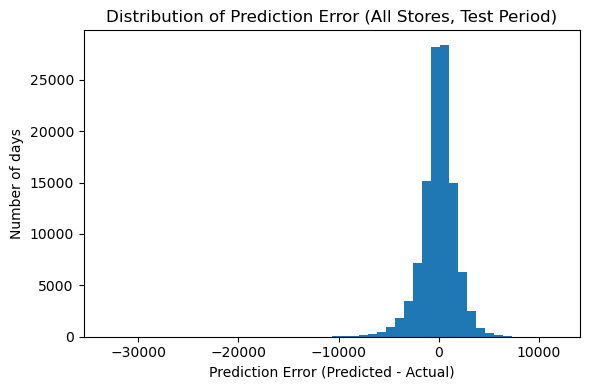

In [79]:
plt.figure(figsize=(6, 4))
plt.hist(test_results["Error"], bins=50)
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Number of days")
plt.title("Distribution of Prediction Error (All Stores, Test Period)")
plt.tight_layout()


In [81]:
import sys
!{sys.executable} -m pip install streamlit


In [83]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Load data that was saved from the notebook
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")

st.title("Retail Demand Forecasting Dashboard")
st.write("Daily sales forecasting and inventory support for multiple stores.")

st.subheader("Model Performance")
st.dataframe(metrics)


Writing app.py


In [85]:
import os
os.getcwd()


'C:\\Users\\yosep\\OneDrive\\Desktop\\Retail Demand Forecasting'

In [87]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

# Load data files
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")

st.title("Retail Demand Forecasting Dashboard")
st.write(
    "Daily sales forecasting and model performance view for multiple retail stores."
)

# --- Model performance overview ---
st.subheader("Model Performance Overview")

# Identify baseline and RandomForest rows
baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
rf_row = metrics[metrics["model"].str.contains("RandomForest")].iloc[0]

abs_improvement = baseline_row["mape"] - rf_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric("RandomForest MAPE", f"{rf_row['mape']:.2f}%")
col3.metric("MAPE improvement", f"{abs_improvement:.2f} pts", f"{rel_improvement:.2f}%")

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

with st.expander("Show detailed metrics table"):
    st.dataframe(metrics, use_container_width=True)

# --- Feature importance section ---
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)

st.bar_chart(
    fi_plot_data.set_index("feature"),
    use_container_width=True,
)

# --- Store-level forecast view ---
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)

store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]

st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Lines show historical actual sales and model predictions for the selected store during the test period."
)

# --- Error distribution section ---
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]

hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )


Overwriting app.py


In [89]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")

st.title("Retail Demand Forecasting Dashboard")
st.write(
    "Daily sales forecasting and model performance view for multiple retail stores."
)

st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
rf_row = metrics[metrics["model"].str.contains("RandomForest")].iloc[0]

abs_improvement = baseline_row["mape"] - rf_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric("RandomForest MAPE", f"{rf_row['mape']:.2f}%")
col3.metric("MAPE improvement", f"{abs_improvement:.2f} pts", f"{rel_improvement:.2f}%")

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

with st.expander("Show detailed metrics table"):
    st.dataframe(metrics, use_container_width=True)

st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)

st.bar_chart(
    fi_plot_data.set_index("feature"),
    use_container_width=True,
)

st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)

store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]

st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Lines show historical actual sales and model predictions for the selected store during the test period."
)

st.subheader("Inventory Suggestion (Demo)")

st.write(
    "Simple demo that uses predicted demand and forecast uncertainty to suggest an order quantity for the selected store."
)

lead_time = st.slider("Planning horizon (days)", min_value=7, max_value=30, value=14, step=1)
service_level_label = st.selectbox("Target service level", ["90%", "95%", "99%"])
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(0.0, forecast_demand + safety_stock - current_stock)

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock."
    )

st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]

hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )


Overwriting app.py


In [91]:
import sys
!{sys.executable} -m pip install xgboost


In [93]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [95]:
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100

print(f"XGBoost RMSE: {rmse_xgb:,.2f}")
print(f"XGBoost MAPE: {mape_xgb:.2f}%")


XGBoost RMSE: 1,724.45
XGBoost MAPE: 18.86%


C:\Users\yosep\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
metrics = pd.DataFrame({
    "model": ["Baseline (lag-7)", "RandomForest", "XGBoost"],
    "rmse":  [baseline_rmse,       rmse_test,     rmse_xgb],
    "mape":  [baseline_mape,       mape_test,     mape_xgb],
})

metrics.to_csv("model_metrics.csv", index=False)
metrics


,model,rmse,mape
0,Baseline (lag-7),3053.463306,36.256860
1,RandomForest,1703.422791,18.322809
2,XGBoost,1724.450733,18.861778


In [99]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")

st.title("Retail Demand Forecasting Dashboard")
st.write(
    "Daily sales forecasting and model performance view for multiple retail stores."
)

# ---------------- Model performance overview ----------------
st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
model_rows = metrics[~metrics["model"].str.contains("Baseline")]

best_row = model_rows.loc[model_rows["mape"].idxmin()]

abs_improvement = baseline_row["mape"] - best_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
col3.metric("MAPE improvement", f"{abs_improvement:.2f} pts", f"{rel_improvement:.2f}%")

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

st.markdown(
    f"**Best model on the test period:** `{best_row['model']}` "
    f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
    f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
)

with st.expander("Show detailed metrics table"):
    st.dataframe(metrics, use_container_width=True)

# ---------------- Feature importance ----------------
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)

st.bar_chart(
    fi_plot_data.set_index("feature"),
    use_container_width=True,
)

# ---------------- Store-level view ----------------
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)

store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]

st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Lines show historical actual sales and model predictions for the selected store during the test period."
)

# ---------------- Inventory suggestions ----------------
st.subheader("Inventory Suggestion (Demo)")

st.write(
    "Simple demo that uses predicted demand and forecast uncertainty to suggest an order quantity for the selected store."
)

lead_time = st.slider("Planning horizon (days)", min_value=7, max_value=30, value=14, step=1)
service_level_label = st.selectbox("Target service level", ["90%", "95%", "99%"])
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(0.0, forecast_demand + safety_stock - current_stock)

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock."
    )

# ---------------- Error distribution ----------------
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]

hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )


Overwriting app.py


In [102]:
# Advanced time-series features
full = full.sort_values(["Store", "Date"]).reset_index(drop=True)

# Extra lag features
for lag in [1, 7, 14, 28]:
    full[f"Sales_lag_{lag}"] = (
        full.groupby("Store")["Sales"].shift(lag)
    )

# Rolling mean features
full["Sales_roll_7_mean"] = (
    full.groupby("Store")["Sales"]
    .transform(lambda x: x.rolling(7).mean())
)

full["Sales_roll_28_mean"] = (
    full.groupby("Store")["Sales"]
    .transform(lambda x: x.rolling(28).mean())
)

full[["Store", "Date", "Sales",
      "Sales_lag_1", "Sales_lag_7", "Sales_lag_14", "Sales_lag_28",
      "Sales_roll_7_mean", "Sales_roll_28_mean"]].head(12)


,Store,Date,Sales,Sales_lag_1,Sales_lag_7,Sales_lag_14,Sales_lag_28,Sales_roll_7_mean,Sales_roll_28_mean
0,1,2013-01-02,5530,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-03,4327,5530.0,NaN,NaN,NaN,NaN,NaN
2,1,2013-01-04,4486,4327.0,NaN,NaN,NaN,NaN,NaN
3,1,2013-01-05,4997,4486.0,NaN,NaN,NaN,NaN,NaN
4,1,2013-01-07,7176,4997.0,NaN,NaN,NaN,NaN,NaN
5,1,2013-01-08,5580,7176.0,NaN,NaN,NaN,NaN,NaN
6,1,2013-01-09,5471,5580.0,NaN,NaN,NaN,5366.714286,NaN
7,1,2013-01-10,4892,5471.0,5530.0,NaN,NaN,5275.571429,NaN
8,1,2013-01-11,4881,4892.0,4327.0,NaN,NaN,5354.714286,NaN
9,1,2013-01-12,4952,4881.0,4486.0,NaN,NaN,5421.285714,NaN


In [104]:
advanced_feature_cols = [
    "Sales_lag_1",
    "Sales_lag_7",
    "Sales_lag_14",
    "Sales_lag_28",
    "Sales_roll_7_mean",
    "Sales_roll_28_mean",
]

full_model_adv = full.dropna(subset=advanced_feature_cols).copy()
full_model_adv.shape


(813118, 26)

In [106]:
# Time-based split for the advanced feature dataset
split_date = pd.to_datetime("2015-04-01")

train_data_adv = full_model_adv[full_model_adv["Date"] < split_date].copy()
test_data_adv  = full_model_adv[full_model_adv["Date"] >= split_date].copy()

train_data_adv["Date"].min(), train_data_adv["Date"].max(), test_data_adv["Date"].min(), test_data_adv["Date"].max()


(Timestamp('2013-01-29 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-07-31 00:00:00'))

In [108]:
feature_cols_adv = [
    "Store",
    "DayOfWeek",
    "Promo",
    "Year",
    "Month",
    "Sales_lag_1",
    "Sales_lag_7",
    "Sales_lag_14",
    "Sales_lag_28",
    "Sales_roll_7_mean",
    "Sales_roll_28_mean",
]

X_train_adv = train_data_adv[feature_cols_adv]
y_train_adv = train_data_adv["Sales"]

X_test_adv = test_data_adv[feature_cols_adv]
y_test_adv = test_data_adv["Sales"]

X_train_adv.shape, X_test_adv.shape


((701697, 11), (111421, 11))

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf_adv = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    n_jobs=-1,
    random_state=42
)

rf_adv.fit(X_train_adv, y_train_adv)


RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [112]:
y_pred_rf_adv = rf_adv.predict(X_test_adv)

rmse_rf_adv = mean_squared_error(y_test_adv, y_pred_rf_adv, squared=False)
mape_rf_adv = mean_absolute_percentage_error(y_test_adv, y_pred_rf_adv) * 100

print(f"RF advanced RMSE: {rmse_rf_adv:,.2f}")
print(f"RF advanced MAPE: {mape_rf_adv:.2f}%")


RF advanced RMSE: 982.57
RF advanced MAPE: 10.14%


C:\Users\yosep\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [114]:
# Baseline on the advanced dataset: predict sales = lag-7 sales
baseline_pred_adv = X_test_adv["Sales_lag_7"].values

baseline_rmse_adv = mean_squared_error(y_test_adv, baseline_pred_adv, squared=False)
baseline_mape_adv = mean_absolute_percentage_error(y_test_adv, baseline_pred_adv) * 100

print(f"Baseline (advanced) RMSE: {baseline_rmse_adv:,.2f}")
print(f"Baseline (advanced) MAPE: {baseline_mape_adv:.2f}%")


Baseline (advanced) RMSE: 3,053.46
Baseline (advanced) MAPE: 36.26%


C:\Users\yosep\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
from xgboost import XGBRegressor

xgb_adv = XGBRegressor(
    n_estimators=400,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_adv.fit(X_train_adv, y_train_adv)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=-1, num_parallel_tree=None, ...)

In [119]:
y_pred_xgb_adv = xgb_adv.predict(X_test_adv)

rmse_xgb_adv = mean_squared_error(y_test_adv, y_pred_xgb_adv, squared=False)
mape_xgb_adv = mean_absolute_percentage_error(y_test_adv, y_pred_xgb_adv) * 100

print(f"XGB advanced RMSE: {rmse_xgb_adv:,.2f}")
print(f"XGB advanced MAPE: {mape_xgb_adv:.2f}%")


XGB advanced RMSE: 926.47
XGB advanced MAPE: 9.56%


C:\Users\yosep\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [121]:
metrics_adv = pd.DataFrame({
    "model": [
        "Baseline (lag-7, advanced)",
        "RandomForest (advanced)",
        "XGBoost (advanced)",
    ],
    "rmse": [baseline_rmse_adv, rmse_rf_adv, rmse_xgb_adv],
    "mape": [baseline_mape_adv, mape_rf_adv, mape_xgb_adv],
})

metrics_adv.to_csv("model_metrics.csv", index=False)
metrics_adv


,model,rmse,mape
0,"Baseline (lag-7, advanced)",3053.463306,36.256860
1,RandomForest (advanced),982.570820,10.143291
2,XGBoost (advanced),926.472805,9.558492


In [123]:
importances_adv = rf_adv.feature_importances_

importances_df_adv = pd.DataFrame({
    "feature": feature_cols_adv,
    "importance": importances_adv,
}).sort_values("importance", ascending=False)

importances_df_adv.to_csv("feature_importances.csv", index=False)
importances_df_adv


,feature,importance
9,Sales_roll_7_mean,0.664881
2,Promo,0.105856
1,DayOfWeek,0.067402
5,Sales_lag_1,0.051197
10,Sales_roll_28_mean,0.042291
8,Sales_lag_28,0.015973
6,Sales_lag_7,0.014691
7,Sales_lag_14,0.014258
4,Month,0.012435
0,Store,0.008337


In [125]:
# Build test results table using advanced XGBoost predictions
test_results_adv = test_data_adv.copy()

test_results_adv["PredictedSales"] = y_pred_xgb_adv
test_results_adv["Error"] = test_results_adv["PredictedSales"] - test_results_adv["Sales"]

test_results_adv[["Store", "Date", "Sales", "PredictedSales", "Error"]].head()


,Store,Date,Sales,PredictedSales,Error
682,1,2015-04-01,6816,6249.206055,-566.793945
683,1,2015-04-02,6574,6189.508789,-384.491211
684,1,2015-04-04,6709,5334.863770,-1374.136230
685,1,2015-04-07,4163,5046.812500,883.812500
686,1,2015-04-08,4194,4147.177246,-46.822754


In [127]:
# Blend RandomForest (advanced) and XGBoost (advanced)
# w = weight on XGBoost, (1 - w) = weight on RandomForest
weights = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

results = []
for w in weights:
    y_pred_ens = w * y_pred_xgb_adv + (1.0 - w) * y_pred_rf_adv
    mape_ens = mean_absolute_percentage_error(y_test_adv, y_pred_ens) * 100
    results.append((w, mape_ens))

for w, m in results:
    print(f"Weight on XGB: {w:.1f}  ->  Ensemble MAPE: {m:.2f}%")


Weight on XGB: 0.0  ->  Ensemble MAPE: 10.14%
Weight on XGB: 0.1  ->  Ensemble MAPE: 10.03%
Weight on XGB: 0.2  ->  Ensemble MAPE: 9.93%
Weight on XGB: 0.3  ->  Ensemble MAPE: 9.84%
Weight on XGB: 0.4  ->  Ensemble MAPE: 9.76%
Weight on XGB: 0.5  ->  Ensemble MAPE: 9.69%
Weight on XGB: 0.6  ->  Ensemble MAPE: 9.64%
Weight on XGB: 0.7  ->  Ensemble MAPE: 9.60%
Weight on XGB: 0.8  ->  Ensemble MAPE: 9.57%
Weight on XGB: 0.9  ->  Ensemble MAPE: 9.56%
Weight on XGB: 1.0  ->  Ensemble MAPE: 9.56%


In [129]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

# Basic page config
st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")


def apply_custom_style():
    st.markdown(
        """
        <style>
        /* Hide default Streamlit menu and footer */
        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}

        /* Tighter, centered layout */
        .main .block-container {
            max-width: 1100px;
            padding-top: 1.5rem;
            padding-bottom: 3rem;
        }

        /* Global font */
        html, body, [class*="css"] {
            font-family: "Segoe UI", system-ui, -apple-system, BlinkMacSystemFont,
                         "Roboto", sans-serif;
        }

        /* Headings */
        h1 {
            font-size: 2.2rem;
            font-weight: 700;
        }
        h2, h3 {
            font-weight: 600;
        }

        /* Metric cards */
        [data-testid="stMetric"] {
            background: #f3f4f6;
            padding: 1rem 1.15rem;
            border-radius: 0.9rem;
            border: 1px solid #e5e7eb;
        }
        [data-testid="stMetricLabel"] {
            font-size: 0.8rem;
            color: #6b7280;
        }
        [data-testid="stMetricValue"] {
            font-size: 1.5rem;
            font-weight: 600;
            color: #111827;
        }
        [data-testid="stMetricDelta"] {
            font-size: 0.9rem;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_custom_style()

# Load data for the dashboard
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

# ---------------------------------------------------------
# Title and intro
# ---------------------------------------------------------
st.title("Retail Demand Forecasting Dashboard")
st.write(
    "Daily sales forecasting and model performance view for multiple retail stores. "
    "The focus is on short-horizon demand prediction that can support inventory decisions."
)

# ---------------------------------------------------------
# Model performance overview
# ---------------------------------------------------------
st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
model_rows = metrics[~metrics["model"].str.contains("Baseline")]

best_row = model_rows.loc[model_rows["mape"].idxmin()]

abs_improvement = baseline_row["mape"] - best_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
col3.metric(
    "MAPE improvement",
    f"{abs_improvement:.2f} pts",
    f"{rel_improvement:.2f}%",
)

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

st.markdown(
    f"**Best model on the test period:** `{best_row['model']}` "
    f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
    f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
)

with st.expander("Show detailed metrics table"):
    st.dataframe(metrics, use_container_width=True)

st.markdown("---")

# ---------------------------------------------------------
# Feature importance
# ---------------------------------------------------------
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)

st.bar_chart(
    fi_plot_data.set_index("feature"),
    use_container_width=True,
)

st.caption(
    "Relative importance of input features in the RandomForest (advanced) model. "
    "Higher bars indicate features that contribute more to the predictions."
)

st.markdown("---")

# ---------------------------------------------------------
# Store-level view
# ---------------------------------------------------------
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)

store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]

st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Lines show historical actual sales and model predictions for the selected store "
    "during the test period."
)

st.markdown("---")

# ---------------------------------------------------------
# Inventory suggestions (demo)
# ---------------------------------------------------------
st.subheader("Inventory Suggestion (Demo)")

st.write(
    "Simple demo that uses predicted demand and forecast uncertainty to suggest "
    "an order quantity for the selected store."
)

lead_time = st.slider(
    "Planning horizon (days)", min_value=7, max_value=30, value=14, step=1
)
service_level_label = st.selectbox(
    "Target service level", ["90%", "95%", "99%"]
)
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(
        0.0, forecast_demand + safety_stock - current_stock
    )

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock."
    )

st.markdown("---")

# ---------------------------------------------------------
# Error distribution
# ---------------------------------------------------------
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]

hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )


Overwriting app.py


In [131]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")


def apply_custom_style():
    st.markdown(
        """
        <style>
        /* Global page background */
        body {
            background-color: #f3f4f6;
        }
        .main .block-container {
            padding-top: 1.2rem;
            padding-bottom: 3rem;
            max-width: 1160px;
        }

        /* Global font */
        html, body, [class*="css"] {
            font-family: system-ui, -apple-system, BlinkMacSystemFont,
                         "Segoe UI", "Roboto", sans-serif;
            color: #111827;
        }

        /* Hide default menu/footer */
        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}

        /* Headings */
        h1 {
            font-size: 2.3rem;
            font-weight: 700;
            letter-spacing: -0.03em;
        }
        h2, h3 {
            font-weight: 600;
        }

        /* Turn each vertical block into a card */
        section[data-testid="stVerticalBlock"] > div:first-child {
            background-color: #ffffff;
            padding: 1.3rem 1.6rem;
            border-radius: 1.0rem;
            box-shadow: 0 14px 30px rgba(15, 23, 42, 0.06);
            margin-bottom: 1.4rem;
        }

        /* Metrics styling */
        [data-testid="stMetric"] {
            background: #f9fafb;
            padding: 1rem 1.25rem;
            border-radius: 0.9rem;
            border: 1px solid #e5e7eb;
        }
        [data-testid="stMetricLabel"] {
            font-size: 0.8rem;
            color: #6b7280;
            text-transform: uppercase;
            letter-spacing: 0.04em;
        }
        [data-testid="stMetricValue"] {
            font-size: 1.6rem;
            font-weight: 650;
            color: #111827;
        }
        [data-testid="stMetricDelta"] {
            font-size: 0.9rem;
        }

        /* Captions */
        .element-container p {
            font-size: 0.9rem;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_custom_style()

# -------------------------------------------------------------------
# Load data
# -------------------------------------------------------------------
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

# -------------------------------------------------------------------
# Title / intro card
# -------------------------------------------------------------------
st.title("Retail Demand Forecasting Dashboard")
st.write(
    "End-to-end daily sales forecasting for a network of retail stores. "
    "The dashboard highlights model accuracy, feature importance, "
    "store-level predictions, and a simple inventory planning demo."
)

# -------------------------------------------------------------------
# Model performance overview
# -------------------------------------------------------------------
st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
model_rows = metrics[~metrics["model"].str.contains("Baseline")]

best_row = model_rows.loc[model_rows["mape"].idxmin()]

abs_improvement = baseline_row["mape"] - best_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
col3.metric(
    "MAPE improvement",
    f"{abs_improvement:.2f} pts",
    f"{rel_improvement:.2f}%",
)

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

st.markdown(
    f"**Best model on the test period:** `{best_row['model']}` "
    f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
    f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
)

with st.expander("Show full metrics table"):
    st.dataframe(metrics, use_container_width=True)

# -------------------------------------------------------------------
# Feature importance
# -------------------------------------------------------------------
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)
st.bar_chart(fi_plot_data.set_index("feature"), use_container_width=True)

st.caption(
    "Relative importance of input features in the RandomForest (advanced) model. "
    "Calendar and lag features capture trends, seasonality, and short-term momentum."
)

# -------------------------------------------------------------------
# Store-level actual vs predicted
# -------------------------------------------------------------------
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)
store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]
st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Blue line shows historical actual sales; orange line shows model predictions "
    "for the same period for the selected store."
)

# -------------------------------------------------------------------
# Inventory suggestion demo
# -------------------------------------------------------------------
st.subheader("Inventory Suggestion (Demo)")

st.write(
    "This demo converts demand forecasts into a simple order suggestion for the selected store. "
    "Inputs are the planning horizon, service level, and current on-hand stock."
)

lead_time = st.slider(
    "Planning horizon (days)",
    min_value=7,
    max_value=30,
    value=14,
    step=1,
)
service_level_label = st.selectbox(
    "Target service level", ["90%", "95%", "99%"]
)
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(
        0.0, forecast_demand + safety_stock - current_stock
    )

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock. "
        "This is a simplified illustration, not an optimized policy."
    )

# -------------------------------------------------------------------
# Error distribution
# -------------------------------------------------------------------
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]
hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )


Overwriting app.py


In [133]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")


def apply_custom_style():
    st.markdown(
        """
        <style>
        body {
            background-color: #f3f4f6;
        }
        .main .block-container {
            padding-top: 1.2rem;
            padding-bottom: 3rem;
            max-width: 1160px;
        }

        html, body, [class*="css"] {
            font-family: system-ui, -apple-system, BlinkMacSystemFont,
                         "Segoe UI", "Roboto", sans-serif;
            color: #111827;
        }

        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}

        /* Header */
        .header-container {
            margin-bottom: 0.5rem;
        }
        .header-title {
            font-size: 2.4rem;
            font-weight: 700;
            letter-spacing: -0.03em;
            margin-bottom: 0.2rem;
        }
        .header-subtitle {
            font-size: 0.95rem;
            color: #4b5563;
        }

        /* Cards */
        section[data-testid="stVerticalBlock"] > div:first-child {
            background-color: #ffffff;
            padding: 1.3rem 1.6rem;
            border-radius: 1.0rem;
            box-shadow: 0 14px 30px rgba(15, 23, 42, 0.06);
            margin-bottom: 1.4rem;
        }

        /* Metrics */
        [data-testid="stMetric"] {
            background: #f9fafb;
            padding: 1rem 1.25rem;
            border-radius: 0.9rem;
            border: 1px solid #e5e7eb;
        }
        [data-testid="stMetricLabel"] {
            font-size: 0.8rem;
            color: #6b7280;
            text-transform: uppercase;
            letter-spacing: 0.04em;
        }
        [data-testid="stMetricValue"] {
            font-size: 1.6rem;
            font-weight: 650;
            color: #111827;
        }
        [data-testid="stMetricDelta"] {
            font-size: 0.9rem;
        }

        .element-container p {
            font-size: 0.9rem;
        }

        /* Custom footer */
        .custom-footer {
            margin-top: 0.5rem;
            font-size: 0.8rem;
            color: #6b7280;
            text-align: center;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_custom_style()

# -------------------------------------------------------------------
# Load data
# -------------------------------------------------------------------
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

# -------------------------------------------------------------------
# Header card
# -------------------------------------------------------------------
st.markdown(
    """
    <div class="header-container">
        <div class="header-title">Retail Demand Forecasting Dashboard</div>
        <div class="header-subtitle">
            End-to-end daily sales forecasting for a chain of retail stores.<br/>
            Powered by gradient-boosted trees, rich time-series features, and an interactive analytics view.
        </div>
    </div>
    """,
    unsafe_allow_html=True,
)

# -------------------------------------------------------------------
# Model performance overview
# -------------------------------------------------------------------
st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
model_rows = metrics[~metrics["model"].str.contains("Baseline")]

best_row = model_rows.loc[model_rows["mape"].idxmin()]

abs_improvement = baseline_row["mape"] - best_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
col3.metric(
    "MAPE improvement",
    f"{abs_improvement:.2f} pts",
    f"{rel_improvement:.2f}%",
)

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

st.markdown(
    f"**Best model on the test period:** `{best_row['model']}` "
    f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
    f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
)

with st.expander("Show full metrics table"):
    st.dataframe(metrics, use_container_width=True)

# -------------------------------------------------------------------
# Feature importance
# -------------------------------------------------------------------
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)
st.bar_chart(fi_plot_data.set_index("feature"), use_container_width=True)

st.caption(
    "Relative importance of input features in the RandomForest (advanced) model. "
    "Calendar and lag features capture trends, seasonality, and short-term momentum."
)

# -------------------------------------------------------------------
# Store-level actual vs predicted
# -------------------------------------------------------------------
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)
store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]
st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Blue line shows historical actual sales; orange line shows model predictions "
    "for the same period for the selected store."
)

# -------------------------------------------------------------------
# Inventory suggestion demo
# -------------------------------------------------------------------
st.subheader("Inventory Suggestion (Demo)")

st.write(
    "This demo converts demand forecasts into a simple order suggestion for the selected store. "
    "Inputs are the planning horizon, service level, and current on-hand stock."
)

lead_time = st.slider(
    "Planning horizon (days)",
    min_value=7,
    max_value=30,
    value=14,
    step=1,
)
service_level_label = st.selectbox(
    "Target service level", ["90%", "95%", "99%"]
)
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(
        0.0, forecast_demand + safety_stock - current_stock
    )

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock. "
        "This is a simplified illustration, not an optimized policy."
    )

# -------------------------------------------------------------------
# Error distribution
# -------------------------------------------------------------------
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]
hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
            "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
            "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )

# -------------------------------------------------------------------
# Custom footer with credits
# -------------------------------------------------------------------
st.markdown(
    """
    <div class="custom-footer">
        Data source: Rossmann Store Sales dataset (Kaggle).<br/>
        Dashboard design and implementation: <strong>Yoseph Lijalem</strong>.
    </div>
    """,
    unsafe_allow_html=True,
)


Overwriting app.py


In [135]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")


def apply_custom_style():
    st.markdown(
        """
        <style>
        /* Dark background */
        body {
            background-color: #020617; /* slate-950 */
        }
        .main .block-container {
            padding-top: 3.0rem;   /* extra space so header is not tight to top */
            padding-bottom: 3rem;
            max-width: 1160px;
        }

        html, body, [class*="css"] {
            font-family: system-ui, -apple-system, BlinkMacSystemFont,
                         "Segoe UI", "Roboto", sans-serif;
            color: #e5e7eb; /* light text */
        }

        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}

        /* Header area */
        .header-container {
            margin-bottom: 0.5rem;
        }
        .header-title {
            font-size: 2.4rem;
            font-weight: 750;
            letter-spacing: -0.04em;
            margin-bottom: 0.25rem;
        }
        .header-subtitle {
            font-size: 0.95rem;
            color: #9ca3af;
        }

        /* Card styling for each vertical block */
        section[data-testid="stVerticalBlock"] > div:first-child {
            background-color: #111827;          /* slate-900 */
            padding: 1.4rem 1.7rem;
            border-radius: 1.0rem;
            box-shadow: 0 22px 45px rgba(15, 23, 42, 0.75);
            border: 1px solid #1f2937;
            margin-bottom: 1.6rem;
        }

        /* Subheaders */
        h2, h3 {
            font-weight: 600;
            color: #e5e7eb;
        }

        /* Metrics */
        [data-testid="stMetric"] {
            background: #020617;
            padding: 1rem 1.25rem;
            border-radius: 0.9rem;
            border: 1px solid #1f2937;
        }
        [data-testid="stMetricLabel"] {
            font-size: 0.75rem;
            color: #9ca3af;
            text-transform: uppercase;
            letter-spacing: 0.08em;
        }
        [data-testid="stMetricValue"] {
            font-size: 1.7rem;
            font-weight: 700;
            color: #f9fafb;
        }
        [data-testid="stMetricDelta"] {
            font-size: 0.9rem;
        }

        /* Paragraph text */
        .element-container p {
            font-size: 0.9rem;
            color: #d1d5db;
        }

        /* Dataframe text */
        .stDataFrame {
            color: #e5e7eb;
        }

        /* Custom footer */
        .custom-footer {
            margin-top: 0.5rem;
            font-size: 0.8rem;
            color: #9ca3af;
            text-align: center;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_custom_style()

# -------------------------------------------------------------------
# Load data
# -------------------------------------------------------------------
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

# -------------------------------------------------------------------
# Header card
# -------------------------------------------------------------------
st.markdown(
    """
    <div class="header-container">
        <div class="header-title">Retail Demand Forecasting Dashboard</div>
        <div class="header-subtitle">
            End-to-end daily sales forecasting for a chain of retail stores.<br/>
            Powered by gradient-boosted trees, rich time-series features, and an interactive analytics view.
        </div>
    </div>
    """,
    unsafe_allow_html=True,
)

# -------------------------------------------------------------------
# Model performance overview
# -------------------------------------------------------------------
st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
model_rows = metrics[~metrics["model"].str.contains("Baseline")]

best_row = model_rows.loc[model_rows["mape"].idxmin()]

abs_improvement = baseline_row["mape"] - best_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
col3.metric(
    "MAPE improvement",
    f"{abs_improvement:.2f} pts",
    f"{rel_improvement:.2f}%",
)

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

st.markdown(
    f"**Best model on the test period:** `{best_row['model']}` "
    f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
    f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
)

with st.expander("Show full metrics table"):
    st.dataframe(metrics, use_container_width=True)

# -------------------------------------------------------------------
# Feature importance
# -------------------------------------------------------------------
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)
st.bar_chart(fi_plot_data.set_index("feature"), use_container_width=True)

st.caption(
    "Relative importance of input features in the RandomForest (advanced) model. "
    "Calendar and lag features capture trends, seasonality, and short-term momentum."
)

# -------------------------------------------------------------------
# Store-level actual vs predicted
# -------------------------------------------------------------------
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)
store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]
st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Blue line shows historical actual sales; orange line shows model predictions "
    "for the same period for the selected store."
)

# -------------------------------------------------------------------
# Inventory suggestion demo
# -------------------------------------------------------------------
st.subheader("Inventory Suggestion (Demo)")

st.write(
    "This demo converts demand forecasts into a simple order suggestion for the selected store. "
    "Inputs are the planning horizon, service level, and current on-hand stock."
)

lead_time = st.slider(
    "Planning horizon (days)",
    min_value=7,
    max_value=30,
    value=14,
    step=1,
)
service_level_label = st.selectbox(
    "Target service level", ["90%", "95%", "99%"]
)
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(
        0.0, forecast_demand + safety_stock - current_stock
    )

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock. "
        "This is a simplified illustration, not an optimized policy."
    )

# -------------------------------------------------------------------
# Error distribution
# -------------------------------------------------------------------
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]
hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )

# -------------------------------------------------------------------
# Custom footer with credits
# -------------------------------------------------------------------
st.markdown(
    """
    <div class="custom-footer">
        Data source: Rossmann Store Sales dataset (Kaggle).<br/>
        Dashboard design and implementation: <strong>Yoseph Lijalem</strong>.
    </div>
    """,
    unsafe_allow_html=True,
)


Overwriting app.py


In [137]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")


def apply_custom_style():
    st.markdown(
        """
        <style>
        /* Whole page dark background */
        body {
            background-color: #020617; /* very dark slate */
        }

        .main .block-container {
            padding-top: 3rem;        /* space from browser bar */
            padding-bottom: 3rem;
            max-width: 1160px;
        }

        /* Global font + text color */
        html, body, [class*="css"] {
            font-family: system-ui, -apple-system, BlinkMacSystemFont,
                         "Segoe UI", "Roboto", sans-serif;
            color: #e5e7eb;
        }

        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}

        /* Header */
        .header-container {
            margin-bottom: 0.8rem;
        }
        .header-title {
            font-size: 2.4rem;
            font-weight: 750;
            letter-spacing: -0.04em;
            margin-bottom: 0.25rem;
        }
        .header-subtitle {
            font-size: 0.95rem;
            color: #9ca3af;
        }

        /* Card styling for each top-level vertical block */
        section[data-testid="stVerticalBlock"] > div:first-child {
            background-color: #020617;
            padding: 0;
            margin-bottom: 1.2rem;
            box-shadow: none;
        }

        /* Inner cards (actual content) */
        .card {
            background-color: #0b1120; /* slate-950 */
            padding: 1.4rem 1.7rem;
            border-radius: 1.0rem;
            box-shadow: 0 18px 40px rgba(15, 23, 42, 0.7);
            border: 1px solid #1e293b;
        }

        h2, h3 {
            font-weight: 600;
            color: #e5e7eb;
        }

        /* Metrics */
        [data-testid="stMetric"] {
            background: #020617;
            padding: 1rem 1.2rem;
            border-radius: 0.9rem;
            border: 1px solid #1f2937;
        }
        [data-testid="stMetricLabel"] {
            font-size: 0.75rem;
            color: #9ca3af;
            text-transform: uppercase;
            letter-spacing: 0.08em;
        }
        [data-testid="stMetricValue"] {
            font-size: 1.7rem;
            font-weight: 700;
            color: #f9fafb;
        }

        .element-container p {
            font-size: 0.9rem;
            color: #d1d5db;
        }

        .custom-footer {
            margin-top: 0.5rem;
            font-size: 0.8rem;
            color: #9ca3af;
            text-align: center;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_custom_style()

# -------------------------------------------------------------------
# Load data
# -------------------------------------------------------------------
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

# -------------------------------------------------------------------
# Header
# -------------------------------------------------------------------
st.markdown(
    """
    <div class="header-container">
        <div class="header-title">Retail Demand Forecasting Dashboard</div>
        <div class="header-subtitle">
            Daily sales forecasting for a chain of retail stores.<br/>
            Powered by gradient-boosted trees, rich time-series features, and an interactive analytics view.
        </div>
    </div>
    """,
    unsafe_allow_html=True,
)

# ---------- helper for dark Altair charts ----------
def dark_chart_base(chart):
    return (
        chart.properties(background="#0b1120")
        .configure_axis(
            labelColor="#e5e7eb",
            titleColor="#e5e7eb",
            gridColor="#1f2937"
        )
        .configure_legend(
            labelColor="#e5e7eb",
            titleColor="#e5e7eb"
        )
    )


# -------------------------------------------------------------------
# Model Performance Overview (card)
# -------------------------------------------------------------------
with st.container():
    st.markdown('<div class="card">', unsafe_allow_html=True)

    st.subheader("Model Performance Overview")

    baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
    model_rows = metrics[~metrics["model"].str.contains("Baseline")]

    best_row = model_rows.loc[model_rows["mape"].idxmin()]

    abs_improvement = baseline_row["mape"] - best_row["mape"]
    rel_improvement = abs_improvement / baseline_row["mape"] * 100

    col1, col2, col3 = st.columns(3)
    col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
    col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
    col3.metric(
        "MAPE improvement",
        f"{abs_improvement:.2f} pts",
        f"{rel_improvement:.2f}%",
    )

    st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

    st.markdown(
        f"**Best model on the test period:** `{best_row['model']}` "
        f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
        f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
    )

    with st.expander("Show full metrics table"):
        st.dataframe(metrics, use_container_width=True)

    st.markdown("</div>", unsafe_allow_html=True)

# -------------------------------------------------------------------
# Feature importance (card)
# -------------------------------------------------------------------
with st.container():
    st.markdown('<div class="card">', unsafe_allow_html=True)

    st.subheader("Feature Importance")

    fi_plot_data = feature_importances.sort_values("importance", ascending=False)

    fi_chart = alt.Chart(fi_plot_data).mark_bar().encode(
        x=alt.X("importance:Q", title="Importance"),
        y=alt.Y("feature:N", sort="-x", title="Feature"),
        color=alt.value("#38bdf8"),  # cyan-400
        tooltip=["feature", "importance"]
    ).properties(height=380)

    st.altair_chart(dark_chart_base(fi_chart), use_container_width=True)

    st.caption(
        "Relative importance of input features in the RandomForest (advanced) model. "
        "Calendar and lag features capture trends, seasonality, and short-term momentum."
    )

    st.markdown("</div>", unsafe_allow_html=True)

# -------------------------------------------------------------------
# Store-level actual vs predicted (card)
# -------------------------------------------------------------------
with st.container():
    st.markdown('<div class="card">', unsafe_allow_html=True)

    st.subheader("Store-Level Actual vs Predicted")

    store_ids = sorted(test_results["Store"].unique())
    selected_store = st.selectbox("Select store ID", store_ids)

    store_df = (
        test_results[test_results["Store"] == selected_store]
        .sort_values("Date")
        .copy()
    )
    store_df["Date"] = pd.to_datetime(store_df["Date"])

    long_df = store_df.melt(
        id_vars="Date",
        value_vars=["Sales", "PredictedSales"],
        var_name="Type",
        value_name="Value",
    )

    color_scale = alt.Scale(
        domain=["Sales", "PredictedSales"],
        range=["#22c55e", "#f97316"],  # green & orange
    )

    store_chart = (
        alt.Chart(long_df)
        .mark_line(point=False)
        .encode(
            x=alt.X("Date:T", title="Date"),
            y=alt.Y("Value:Q", title="Sales"),
            color=alt.Color("Type:N", scale=color_scale, title=""),
            tooltip=["Date:T", "Type:N", "Value:Q"],
        )
        .properties(height=380)
    )

    st.altair_chart(dark_chart_base(store_chart), use_container_width=True)

    st.caption(
        "Green line shows historical actual sales; orange line shows model predictions "
        "for the same period for the selected store."
    )

    st.markdown("</div>", unsafe_allow_html=True)

# -------------------------------------------------------------------
# Inventory suggestion (card)
# -------------------------------------------------------------------
with st.container():
    st.markdown('<div class="card">', unsafe_allow_html=True)

    st.subheader("Inventory Suggestion (Demo)")

    st.write(
        "Simple translation of demand forecasts into an order suggestion for the selected store. "
        "Inputs are the planning horizon, service level, and current on-hand stock."
    )

    lead_time = st.slider(
        "Planning horizon (days)",
        min_value=7,
        max_value=30,
        value=14,
        step=1,
    )
    service_level_label = st.selectbox(
        "Target service level", ["90%", "95%", "99%"]
    )
    service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
    z = service_level_map[service_level_label]

    if store_df.empty:
        current_stock_default = 0.0
    else:
        current_stock_default = float(store_df["Sales"].tail(7).mean())

    current_stock = st.number_input(
        "Current stock level for this store (units)",
        min_value=0.0,
        value=current_stock_default,
        step=10.0,
    )

    if store_df.empty:
        st.warning("No test data available for this store.")
    else:
        horizon_df = store_df.sort_values("Date").head(lead_time)
        forecast_demand = horizon_df["PredictedSales"].sum()

        sigma_daily = store_df["Error"].std()
        if np.isnan(sigma_daily):
            sigma_daily = 0.0

        safety_stock = z * sigma_daily * np.sqrt(lead_time)
        recommended_order = max(
            0.0, forecast_demand + safety_stock - current_stock
        )

        c_inv1, c_inv2, c_inv3 = st.columns(3)
        c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
        c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
        c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

        st.caption(
            "Order quantity = forecast for the horizon + safety stock − current stock. "
            "This is a simplified illustration, not an optimized policy."
        )

    st.markdown("</div>", unsafe_allow_html=True)

# -------------------------------------------------------------------
# Error distribution (card)
# -------------------------------------------------------------------
with st.container():
    st.markdown('<div class="card">', unsafe_allow_html=True)

    st.subheader("Prediction Error Distribution (Test Set)")

    error_data = test_results["Error"]
    hist_values, bin_edges = np.histogram(error_data, bins=40)
    hist_df = pd.DataFrame(
        {
            "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
            "count": hist_values,
        }
    )

    hist_chart = alt.Chart(hist_df).mark_bar().encode(
        x=alt.X("bin_center:Q", title="Prediction error (Predicted − Actual)"),
        y=alt.Y("count:Q", title="Count"),
        color=alt.value("#a855f7"),  # violet
        tooltip=["bin_center", "count"],
    ).properties(height=320)

    st.altair_chart(dark_chart_base(hist_chart), use_container_width=True)

    summary = error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(summary)

    st.markdown("</div>", unsafe_allow_html=True)

# -------------------------------------------------------------------
# Footer credits
# -------------------------------------------------------------------
st.markdown(
    """
    <div class="custom-footer">
        Data source: Rossmann Store Sales dataset (Kaggle).<br/>
        Dashboard design and implementation: <strong>Yoseph Lijalem</strong>.
    </div>
    """,
    unsafe_allow_html=True,
)


Overwriting app.py


In [179]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt

# ---------------------------------------------------------
# Page config
# ---------------------------------------------------------
st.set_page_config(
    page_title="Retail Demand Forecasting",
    layout="wide",
)


# ---------------------------------------------------------
# Minimal styling (keep default light theme)
# ---------------------------------------------------------
def apply_basic_style():
    st.markdown(
        """
        <style>
        /* Make content a bit wider and add top padding */
        .main .block-container {
            padding-top: 2rem;
            padding-bottom: 2rem;
            max-width: 1200px;
        }
        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_basic_style()


# ---------------------------------------------------------
# Load data
# ---------------------------------------------------------
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")


# ---------------------------------------------------------
# Header with credit
# ---------------------------------------------------------
st.title("Retail Demand Forecasting Dashboard")

st.markdown(
    "Daily sales forecasting for a chain of retail stores powered by "
    "gradient-boosted trees and rich time-series features."
)

st.markdown(
    "All machine learning modeling and dashboard implementation by "
    "**Yoseph Lijalem**.  \n"
    "Data source: Rossmann Store Sales (Kaggle)."
)


# ---------------------------------------------------------
# Helper for Altair charts
# ---------------------------------------------------------
def base_chart(chart):
    return chart.configure_axis(
        labelFontSize=11,
        titleFontSize=12,
        gridColor="#e5e7eb",
    ).configure_legend(
        labelFontSize=11,
        titleFontSize=12,
    )


# ---------------------------------------------------------
# Model Performance Overview
# ---------------------------------------------------------
with st.container():
    st.subheader("Model Performance Overview")

    # Baseline vs advanced models
    baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
    model_rows = metrics[~metrics["model"].str.contains("Baseline")]

    # Best model by MAPE
    best_row = model_rows.loc[model_rows["mape"].idxmin()]

    abs_improvement = baseline_row["mape"] - best_row["mape"]
    rel_improvement = abs_improvement / baseline_row["mape"] * 100

    col1, col2, col3 = st.columns(3)
    col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
    col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
    col3.metric(
        "MAPE improvement",
        f"{abs_improvement:.2f} pts",
        f"{rel_improvement:.2f}%",
    )

    st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

    description_text = (
        f"**Best model on the test period:** `{best_row['model']}` "
        f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
        f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
    )
    st.markdown(description_text)

    with st.expander("Show full metrics table"):
        st.dataframe(metrics, use_container_width=True)


# ---------------------------------------------------------
# Feature Importance
# ---------------------------------------------------------
with st.container():
    st.subheader("Feature Importance")

    fi_plot_data = feature_importances.sort_values("importance", ascending=False)

    fi_chart = alt.Chart(fi_plot_data).mark_bar().encode


In [181]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

st.set_page_config(page_title="Retail Demand Forecasting", layout="wide")


def apply_custom_style():
    st.markdown(
        """
        <style>
        /* Global page background */
        body {
            background-color: #f3f4f6;
        }
        .main .block-container {
            padding-top: 1.2rem;
            padding-bottom: 3rem;
            max-width: 1160px;
        }

        /* Global font */
        html, body, [class*="css"] {
            font-family: system-ui, -apple-system, BlinkMacSystemFont,
                         "Segoe UI", "Roboto", sans-serif;
            color: #111827;
        }

        /* Hide default menu/footer */
        #MainMenu {visibility: hidden;}
        footer {visibility: hidden;}

        /* Headings */
        h1 {
            font-size: 2.3rem;
            font-weight: 700;
            letter-spacing: -0.03em;
        }
        h2, h3 {
            font-weight: 600;
        }

        /* Turn each vertical block into a card */
        section[data-testid="stVerticalBlock"] > div:first-child {
            background-color: #ffffff;
            padding: 1.3rem 1.6rem;
            border-radius: 1.0rem;
            box-shadow: 0 14px 30px rgba(15, 23, 42, 0.06);
            margin-bottom: 1.4rem;
        }

        /* Metrics styling */
        [data-testid="stMetric"] {
            background: #f9fafb;
            padding: 1rem 1.25rem;
            border-radius: 0.9rem;
            border: 1px solid #e5e7eb;
        }
        [data-testid="stMetricLabel"] {
            font-size: 0.8rem;
            color: #6b7280;
            text-transform: uppercase;
            letter-spacing: 0.04em;
        }
        [data-testid="stMetricValue"] {
            font-size: 1.6rem;
            font-weight: 650;
            color: #111827;
        }
        [data-testid="stMetricDelta"] {
            font-size: 0.9rem;
        }

        /* Captions */
        .element-container p {
            font-size: 0.9rem;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )


apply_custom_style()

# -------------------------------------------------------------------
# Load data
# -------------------------------------------------------------------
metrics = pd.read_csv("model_metrics.csv")
feature_importances = pd.read_csv("feature_importances.csv")
test_results = pd.read_csv("test_results_with_predictions.csv")

# -------------------------------------------------------------------
# Title / intro card
# -------------------------------------------------------------------
st.title("Retail Demand Forecasting Dashboard")
st.write(
    "End-to-end daily sales forecasting for a network of retail stores. "
    "The dashboard highlights model accuracy, feature importance, "
    "store-level predictions, and a simple inventory planning demo."
)

st.markdown(
    "[📄 View code and README on GitHub]"
    "(https://github.com/yosephlijalem/Retail-Demand-Forecasting-)",
)

# -------------------------------------------------------------------
# Model performance overview
# -------------------------------------------------------------------
st.subheader("Model Performance Overview")

baseline_row = metrics[metrics["model"].str.contains("Baseline")].iloc[0]
model_rows = metrics[~metrics["model"].str.contains("Baseline")]

best_row = model_rows.loc[model_rows["mape"].idxmin()]

abs_improvement = baseline_row["mape"] - best_row["mape"]
rel_improvement = abs_improvement / baseline_row["mape"] * 100

col1, col2, col3 = st.columns(3)
col1.metric("Baseline MAPE", f"{baseline_row['mape']:.2f}%")
col2.metric(f"{best_row['model']} MAPE", f"{best_row['mape']:.2f}%")
col3.metric(
    "MAPE improvement",
    f"{abs_improvement:.2f} pts",
    f"{rel_improvement:.2f}%",
)

st.caption("MAPE = Mean Absolute Percentage Error. Lower values indicate better forecasts.")

st.markdown(
    f"**Best model on the test period:** `{best_row['model']}` "
    f"with **MAPE {best_row['mape']:.2f}%** and **RMSE {best_row['rmse']:,.0f}**, "
    f"compared to baseline MAPE **{baseline_row['mape']:.2f}%**."
)

with st.expander("Show full metrics table"):
    st.dataframe(metrics, use_container_width=True)

# -------------------------------------------------------------------
# Feature importance
# -------------------------------------------------------------------
st.subheader("Feature Importance")

fi_plot_data = feature_importances.sort_values("importance", ascending=True)
st.bar_chart(fi_plot_data.set_index("feature"), use_container_width=True)

st.caption(
    "Relative importance of input features in the RandomForest (advanced) model. "
    "Calendar and lag features capture trends, seasonality, and short-term momentum."
)

# -------------------------------------------------------------------
# Store-level actual vs predicted
# -------------------------------------------------------------------
st.subheader("Store-Level Actual vs Predicted")

store_ids = sorted(test_results["Store"].unique())
selected_store = st.selectbox("Select store ID", store_ids)

store_df = (
    test_results[test_results["Store"] == selected_store]
    .sort_values("Date")
    .copy()
)
store_df["Date"] = pd.to_datetime(store_df["Date"])

store_chart_data = store_df.set_index("Date")[["Sales", "PredictedSales"]]
st.line_chart(store_chart_data, use_container_width=True)

st.caption(
    "Blue line shows historical actual sales; orange line shows model predictions "
    "for the same period for the selected store."
)

# -------------------------------------------------------------------
# Inventory suggestion demo
# -------------------------------------------------------------------
st.subheader("Inventory Suggestion (Demo)")

st.write(
    "This demo converts demand forecasts into a simple order suggestion for the selected store. "
    "Inputs are the planning horizon, service level, and current on-hand stock."
)

lead_time = st.slider(
    "Planning horizon (days)",
    min_value=7,
    max_value=30,
    value=14,
    step=1,
)
service_level_label = st.selectbox(
    "Target service level", ["90%", "95%", "99%"]
)
service_level_map = {"90%": 1.28, "95%": 1.65, "99%": 2.33}
z = service_level_map[service_level_label]

if store_df.empty:
    current_stock_default = 0.0
else:
    current_stock_default = float(store_df["Sales"].tail(7).mean())

current_stock = st.number_input(
    "Current stock level for this store (units)",
    min_value=0.0,
    value=current_stock_default,
    step=10.0,
)

if store_df.empty:
    st.warning("No test data available for this store.")
else:
    horizon_df = store_df.sort_values("Date").head(lead_time)
    forecast_demand = horizon_df["PredictedSales"].sum()

    sigma_daily = store_df["Error"].std()
    if np.isnan(sigma_daily):
        sigma_daily = 0.0

    safety_stock = z * sigma_daily * np.sqrt(lead_time)
    recommended_order = max(
        0.0, forecast_demand + safety_stock - current_stock
    )

    c_inv1, c_inv2, c_inv3 = st.columns(3)
    c_inv1.metric("Forecast demand (next days)", f"{forecast_demand:,.0f}")
    c_inv2.metric("Safety stock", f"{safety_stock:,.0f}")
    c_inv3.metric("Recommended order", f"{recommended_order:,.0f}")

    st.caption(
        "Order quantity = forecast for the horizon + safety stock − current stock. "
        "This is a simplified illustration, not an optimized policy."
    )

# -------------------------------------------------------------------
# Error distribution
# -------------------------------------------------------------------
st.subheader("Prediction Error Distribution (Test Set)")

error_data = test_results["Error"]
hist_values, bin_edges = np.histogram(error_data, bins=50)
hist_df = pd.DataFrame(
    {
        "bin_center": (bin_edges[:-1] + bin_edges[1:]) / 2,
        "count": hist_values,
    }
)

c1, c2 = st.columns([2, 1])

with c1:
    st.bar_chart(hist_df.set_index("bin_center"), use_container_width=True)

with c2:
    st.write("Error summary (Predicted − Actual):")
    st.dataframe(
        error_data.describe()[["mean", "std", "min", "max"]].to_frame("value")
    )


Overwriting app.py


In [183]:
%%writefile requirements.txt
pandas
numpy
scikit-learn
xgboost
streamlit


Writing requirements.txt
